# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Magnetization" data-toc-modified-id="Magnetization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Magnetization</a></div><div class="lev1 toc-item"><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Autocorrelation</a></div><div class="lev1 toc-item"><a href="#Average-Magnetization" data-toc-modified-id="Average-Magnetization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Average Magnetization</a></div><div class="lev1 toc-item"><a href="#Susceptibility" data-toc-modified-id="Susceptibility-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Susceptibility</a></div><div class="lev1 toc-item"><a href="#$\langle-m-\rangle$(T)" data-toc-modified-id="$\langle-m-\rangle$(T)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-5"><span class="MJXp-mo" id="MJXp-Span-6" style="margin-left: 0em; margin-right: 0em;">⟨</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-7">m</span><span class="MJXp-mo" id="MJXp-Span-8" style="margin-left: 0em; margin-right: 0em;">⟩</span></span></span><script type="math/tex" id="MathJax-Element-2">\langle m \rangle</script>(T)</a></div>

In [3]:
%matplotlib inline
import sys
sys.path.insert(0, '../script')
import matplotlib.pyplot as plt
import numpy as np
from fileoperations import ReadFile, SplitData
import os

In [4]:
data_dir = "../data/"

In [28]:
# Mac
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 20

# Magnetization

{'L': 100.0, 'T': 2.25}
[   86.   166.   216. ...,  5442.  5574.  5430.]


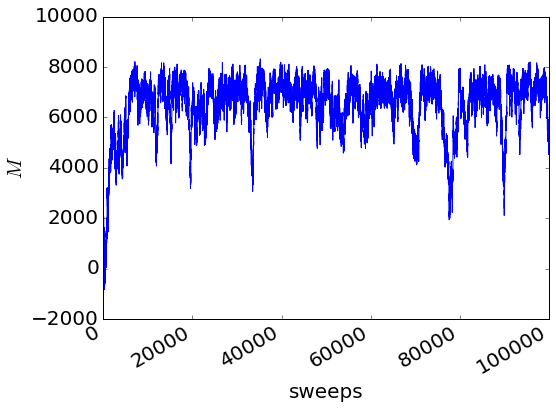

In [55]:
header, [t, E, M] = ReadFile(data_dir + "M_100_2.250.dat", 1, " ")
print(header)
print(M)
fig, ax = plt.subplots()
ax.set_xlabel("sweeps")
ax.set_ylabel(r"$M$")
ax.plot(t, M)
fig.autofmt_xdate()
plt.show()

{'L': 100.0, 'T': 1.5}
[  202.   302.   292. ..., -9824. -9830. -9854.]


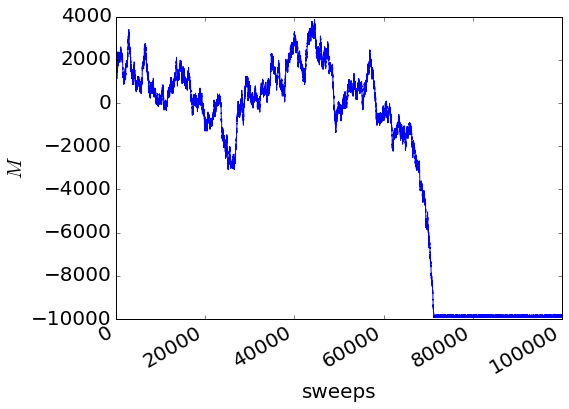

In [44]:
header, [t, E, M] = ReadFile(data_dir + "M_100_1.500.dat", 1, " ")
print(header)
print(M)
fig, ax = plt.subplots()
ax.set_xlabel("sweeps")
ax.set_ylabel(r"$M$")
ax.plot(t, M)
fig.autofmt_xdate()
plt.show()

# Autocorrelation

{'L': 100.0, 'T': 1.5}
[ 0.23362605  0.2336166   0.23360798 ..., -0.11425459 -0.11425469
 -0.11425479]


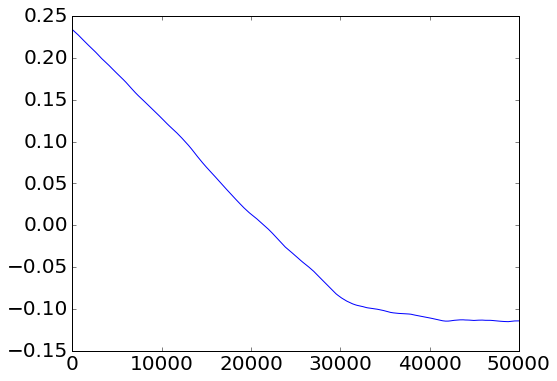

In [43]:
header, [t, E, M] = ReadFile(data_dir + "M_100_1.500.dat", 1, " ")
print(header)
m = M/(header['L']**2)
m -= np.mean(m)
m_hat = np.fft.fft(m)
m_hat_abs = np.abs(m_hat)**2
corr = np.fft.ifft(m_hat_abs)
corr /= M.size
corr = np.real(corr)
print(corr[:int(M.size/2)])
fig, ax = plt.subplots()
ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)])
plt.show()

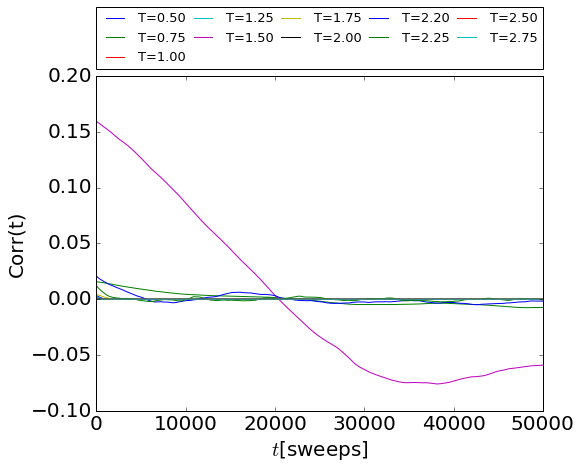

In [42]:
files = os.listdir(data_dir)
M_100_files = []
for element in files:
    if element[:5] == "M_100":
        M_100_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
for element in M_100_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

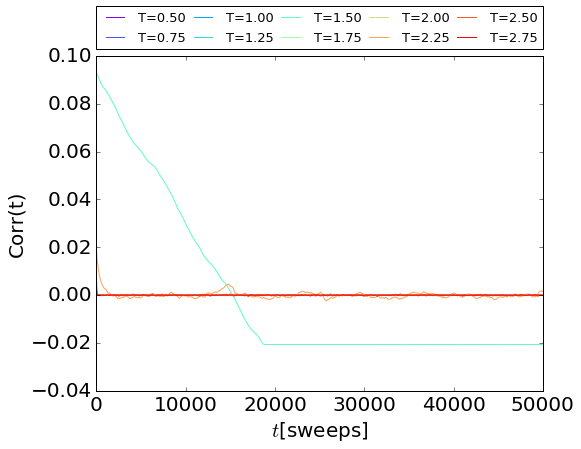

In [45]:
files = os.listdir(data_dir)
M_50_files = []
for element in files:
    if element[:5] == "M_50_":
        M_50_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
NUM_COLORS = len(M_50_files)
color=iter(plt.cm.rainbow(np.linspace(0,1,NUM_COLORS)))
for element in M_50_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    c=next(color)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], c=c, label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

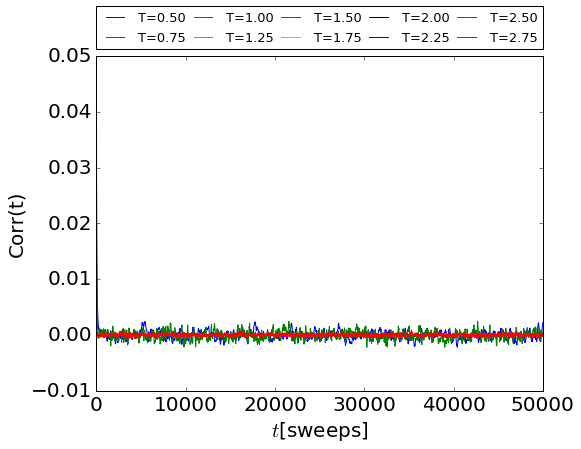

In [46]:
files = os.listdir(data_dir)
M_20_files = []
for element in files:
    if element[:5] == "M_20_":
        M_20_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
for element in M_20_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

# Average Magnetization

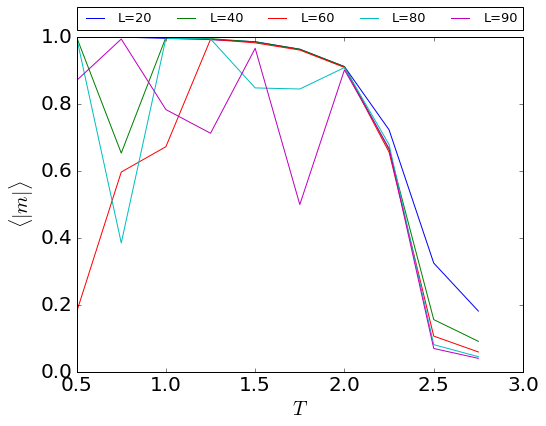

In [50]:
files = os.listdir(data_dir)

fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\langle\vert m \vert\rangle$")
L_list = [20, 40, 60, 80, 90]
for L in L_list:
    M_files = []
    for element in files:
        if element[:4] == "M_" + str(L):
            M_files.append(data_dir + element)
    data = []
    for element in M_files:
        header, [t, E, M] = ReadFile(element, 1, " ")
        data.append([header["T"], np.mean(np.abs(M/L**2))])
    data = np.array(data, dtype=np.float64).transpose()
    ax.plot(data[0], data[1], label="L=%d" % L)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

# Susceptibility

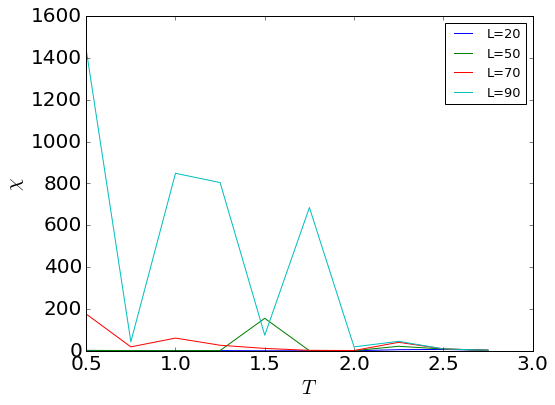

In [48]:
files = os.listdir(data_dir)

fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\chi$")
L_list = [20, 50, 70, 90]
for L in L_list:
    M_files = []
    for element in files:
        if element[:4] == "M_" + str(L):
            M_files.append(data_dir + element)
    data = []
    for element in M_files:
        header, [t, E, M] = ReadFile(element, 1, " ")
        chi = 1/header["T"]*L**2*np.var(np.abs(M)/L**2)
        data.append([header["T"], chi])
    data = np.array(data, dtype=np.float64).transpose()
    ax.plot(data[0], data[1], label="L=%d" % L)

#ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
#          borderaxespad=0., fontsize="13")
ax.legend(loc="best", fontsize="13")
plt.show()

# $\langle m \rangle$(T)

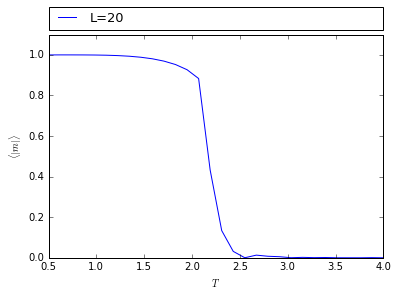

In [20]:
header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")
data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\langle\vert m \vert\rangle$")
for element in data:
    L = element[0][0]
    ax.plot(element[1], np.abs(element[2])/L**2, label="L=%d" %L)
ax.set_xlim(0.5, 4.)
ax.set_ylim(0., 1.1)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()